# Penjelasan Dataset yang digunakan

## 1. Kasus yang diambil

Dataset ini berisi kumpulan artikel berita dari CNN yang mencakup berbagai isu global seperti ekonomi, politik, kesehatan, kebijakan pemerintah, hingga dinamika krisis internasional yang terjadi selama periode pandemi Covid-19. Setiap artikel memuat judul, isi berita, tanggal publikasi, dan tautan sumber yang menunjukkan konteks asli berita tersebut. Berita-berita dalam dataset ini ditulis pada masa ketika pandemi memberikan dampak besar terhadap berbagai sektor, sehingga kontennya banyak membahas mengenai perubahan ekonomi global, respons negara terhadap krisis kesehatan, pelemahan pasar finansial, kebijakan perjalanan internasional, hingga strategi pemulihan ekonomi. Dengan cakupan topik yang luas dan bersifat real time terhadap kejadian global, dataset ini sangat relevan untuk dieksplorasi menggunakan teknik pemodelan topik. Melalui analisis ini, kita dapat mengidentifikasi tema-tema utama yang muncul dalam pemberitaan CNN dan memahami bagaimana isu-isu tersebut saling berkaitan serta berkembang sepanjang periode tersebut.

## 2. Penjelasan setiap kolom dataset
Dataset ini terdiri dari empat kolom utama, yaitu url, title, body, dan date. 
1. Kolom url menyimpan alamat lengkap dari artikel CNN yang menjadi sumber berita, sehingga dapat digunakan sebagai identitas atau referensi asal artikel. Kolom ini akan dihapus dikarenakan kolom ini tidak diperlukan.
2. Kolom title berisi judul berita yang umumnya mencerminkan inti atau ringkasan dari topik yang dibahas.
3. Kolom body merupakan isi artikel secara keseluruhan yang memuat informasi lengkap dan detail mengenai peristiwa yang dilaporkan
4. kolom date mencatat tanggal publikasi artikel sehingga memungkinkan analisis berdasarkan waktu, seperti melihat perubahan tema berita dalam periode tertentu. Kolom ini akan dihapus dikarenakan kolom ini tidak diperlukan.


In [39]:
# 3. Import Library


# Packages to store and manipulate data
import pandas as pd
import numpy as np

# Text Cleaning & NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Feature Extraction (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling (Topic Modeling, Dimensionality Reduction)
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Misc / Utilities
import sklearn


[nltk_data] Downloading package punkt to C:\Users\Java
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Java
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Java
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
## 4. Load Data

df = pd.read_csv(r'D:\Download\doc\Tugas\NLP\Data\CnnData.csv')

In [41]:
df

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020
...,...,...,...,...
296,https://www.cnn.com/2020/03/31/business/food-s...,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...,4/1/2020
297,https://www.cnn.com/2019/07/31/tech/bill-nye-l...,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...,3/24/2020
298,https://www.cnn.com/2020/03/26/perspectives/st...,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in...",3/26/2020
299,https://www.cnn.com/2020/03/24/business/ford-3...,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...,3/24/2020


In [42]:
df = df.drop(columns=[
    'url',
    'date'
])

In [43]:
df

,title,body
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on..."
...,...,...
296,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...
297,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...
298,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in..."
299,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...


# Data Understanding

In [44]:
## 1. Jumlah baris dan kolom

print("1. Jumlah baris dan kolom:", df.shape)

1. Jumlah baris dan kolom: (301, 2)


In [45]:
## 2. Panjang rata-rata setiap baris (jumlah karakter rata-rata per baris)

if 'body' in df.columns:
    df['Panjang_Isi'] = df['body'].astype(str).apply(len)
    avg_length = df[['title', 'body']].astype(str).apply(lambda x: x.str.len()).sum(axis=1).mean()
    print("2. Panjang rata-rata setiap baris (Total Karakter di 'title' + 'body'):", round(avg_length, 2))
else:
    print("Kolom 'body' (isi_berita) atau 'title' (judul) tidak ditemukan. Gagal menghitung panjang rata-rata isi.")

2. Panjang rata-rata setiap baris (Total Karakter di 'title' + 'body'): 4439.26


In [46]:
## 3. Cek data duplikasi

duplicates = df.duplicated().sum()
print("3. DATA DUPLIKAT")
print("Jumlah data duplikat (Baris persis sama):", duplicates)

if duplicates > 0:
    print("> Catatan: Pertimbangkan untuk menghapus duplikat: df = df.drop_duplicates()")
else:
    print("Tidak ada duplikasi baris.")

3. DATA DUPLIKAT
Jumlah data duplikat (Baris persis sama): 0
Tidak ada duplikasi baris.


In [47]:
## 4. Cek data kosong (missing values)

missing = df.isnull().sum()
print("4. DATA KOSONG (Missing Values)")
print("Jumlah data kosong tiap kolom:", missing)

4. DATA KOSONG (Missing Values)
Jumlah data kosong tiap kolom: title          0
body           0
Panjang_Isi    0
dtype: int64


In [48]:
## 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

if 'title' in df.columns:
    all_titles = " ".join(df['title'].astype(str).str.lower())
    words = all_titles.split()
    word_counts = Counter(words)
    df_top_words = (
        pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
        .sort_values(by='Frekuensi', ascending=False)
        .head(10)
    )
    print(df_top_words)
else:
    print("Kolom 'title' tidak ditemukan.")

            Kata  Frekuensi
2            the        127
5             to        113
33   coronavirus         77
25           and         60
72            of         58
157            a         50
17            is         46
70           are         40
77            in         40
152          for         39


BAR CHART (10 Kata Kunci Teratas di Judul)


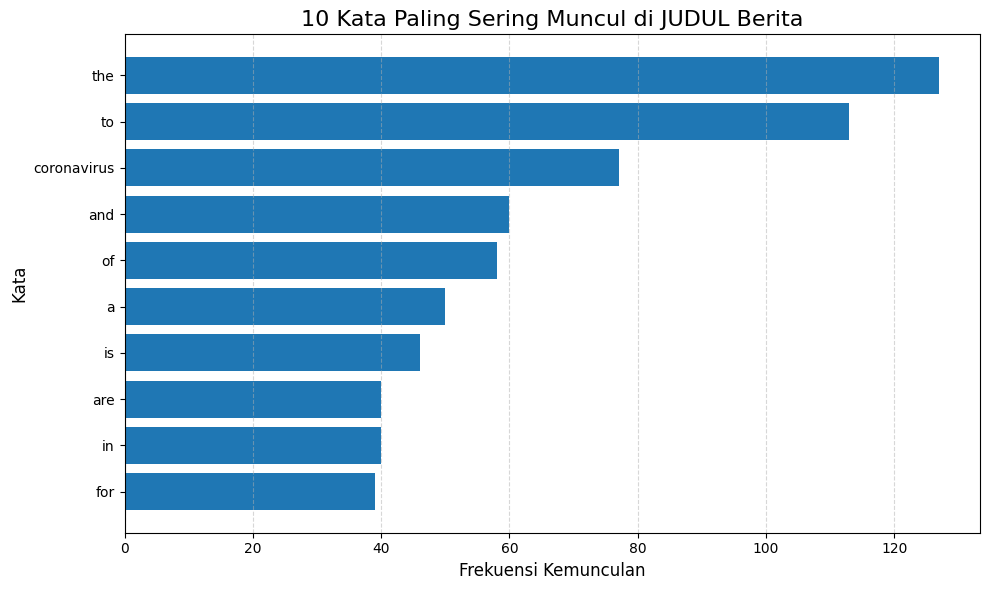

In [49]:
### a. barchart: Distribusi Kata Kunci di tittle
print("BAR CHART (10 Kata Kunci Teratas di Judul)")

if 'title' in df.columns:
    plt.figure(figsize=(10, 6))

    plt.barh(df_top_words['Kata'], df_top_words['Frekuensi'])
    plt.title('10 Kata Paling Sering Muncul di JUDUL Berita', fontsize=16)
    plt.xlabel('Frekuensi Kemunculan', fontsize=12)
    plt.ylabel('Kata', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    plt.gca().invert_yaxis()  # biar ranking 1 paling atas
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'title' tidak ditemukan. Bar Chart Frekuensi Kata tidak dapat dibuat.")

WORD CLOUD (Distribusi Kata di Body)


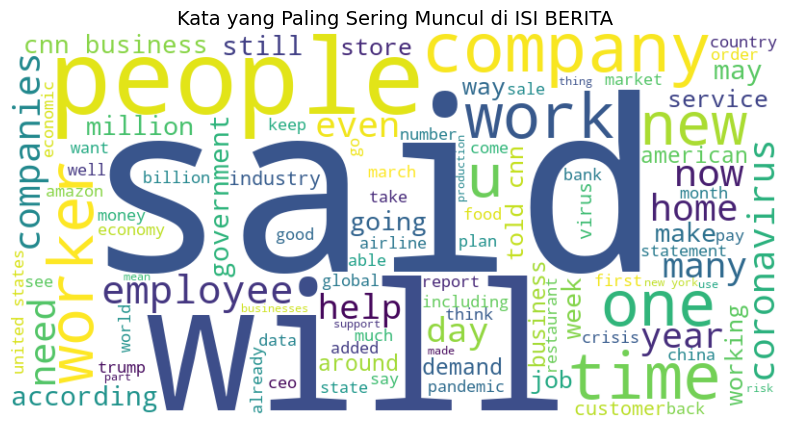

In [50]:
### b. WORD CLOUD: Distribusi Kata terbanyak di body
print("WORD CLOUD (Distribusi Kata di Body)")
if 'body' in df.columns:
    text_data_isi = " ".join(df['body'].astype(str).str.lower())

    wordcloud_isi = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=None,
        max_words=100
    ).generate(text_data_isi)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_isi, interpolation='bilinear')
    plt.axis("off")
    plt.title("Kata yang Paling Sering Muncul di ISI BERITA", fontsize=14)
    plt.show()

else:
    print("Kolom 'body' tidak ditemukan. Word Cloud tidak dapat dibuat.")

# Data Text Processing

In [11]:
df['text'] = df['title'].astype(str) + " " + df['body'].astype(str)

In [12]:
#  Tokenisasi, Lemmatization, Stemming, Stopword removal (Tanda baca, angka dan kata) DAN Text Normalisasi

def preprocess_tokens(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return tokens
def preprocess_text(text):
    return ' '.join(preprocess_tokens(text))

In [13]:
df['tokens_list'] = df['text'].apply(preprocess_tokens)  
df['clean_text'] = df['text'].apply(preprocess_text)     

contoh_kalimat = "The global economy is facing a significant crisis due to inflation and political tensions."
print("Contoh clean text:", preprocess_text(contoh_kalimat))

Contoh clean text: global economy facing significant crisis due inflation political tension


In [14]:
df

,title,body,Panjang_Isi,text,tokens_list,clean_text
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",6337,Japan asked the international media to change ...,"[japan, asked, international, medium, change, ...",japan asked international medium change write ...
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3906,The United States is still too reliant on oil ...,"[united, state, still, reliant, oil, saudi, ar...",united state still reliant oil saudi arabia de...
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3212,Global stocks and US futures rise as policymak...,"[global, stock, u, future, rise, policymakers,...",global stock u future rise policymakers try bl...
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...,9095,China is trying to revive its economy without ...,"[china, trying, revive, economy, without, risk...",china trying revive economy without risking li...
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",7027,Companies that binged on buybacks now seek bai...,"[company, binged, buyback, seek, bailouts, tax...",company binged buyback seek bailouts taxpayer ...
...,...,...,...,...,...,...
296,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...,10416,What happens to our food supply if American fa...,"[happens, food, supply, american, farmer, cant...",happens food supply american farmer cant farm ...
297,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...,2883,Bill Nye's experimental spacecraft that sails ...,"[bill, nyes, experimental, spacecraft, sail, s...",bill nyes experimental spacecraft sail sunligh...
298,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in...",5119,These taxpayers won't get stimulus checks. Tha...,"[taxpayer, wont, get, stimulus, check, thats, ...",taxpayer wont get stimulus check thats unjust ...
299,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...,3951,Ford is working with 3M and GE to make respira...,"[ford, working, ge, make, respirator, ventilat...",ford working ge make respirator ventilator hea...


In [15]:
# 7. Text Vektorisasi

### TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

### Count Vectorizer 
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['clean_text'])
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

Menghitung korelasi...


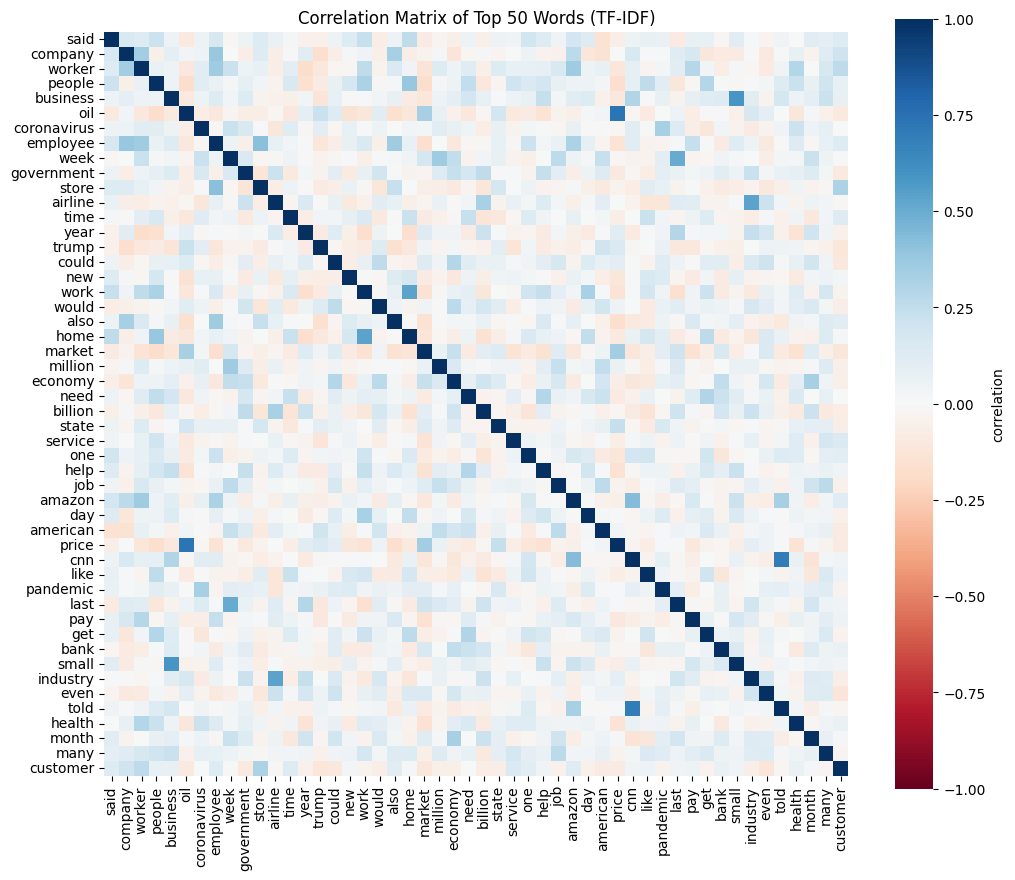

In [16]:
# 6. MatRIK Korelasi
top_n = 50  
top_words = tfidf_df.mean().sort_values(ascending=False).head(top_n).index
tfidf_top = tfidf_df[top_words]
print("Menghitung korelasi...")
correlation_matrix = tfidf_top.corr()  

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,
            cmap='RdBu',
            vmin=-1,
            vmax=1,
            square=True,
            cbar_kws={'label':'correlation'})
plt.title(f"Correlation Matrix of Top {top_n} Words (TF-IDF)")
plt.show()


# Data Modeling

## DATA MODELING: LDA TOPIC MODELING
Model yang digunakan: Latent Dirichlet Allocation (LDA)

LDA adalah metode unsupervised learning yang bertujuan mengelompokkan dokumen ke dalam beberapa topik berdasarkan distribusi kata. 
Setiap dokumen dianggap sebagai campuran beberapa topik, dan setiap topik adalah kumpulan kata yang sering muncul bersama.
LDA dipilih karena metode ini cocok untuk menemukan tema utama dalam teks panjang seperti gabungan title dan body. Model ini mudah dipahami karena setiap topik ditampilkan sebagai kumpulan kata-kata yang paling sering muncul. LDA juga umum digunakan dalam NLP untuk mengeksplorasi dan memahami isi dataset teks yang belum memiliki label.

In [17]:
n_topics = 3
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X_count)

LatentDirichletAllocation(n_components=3, random_state=42)

In [18]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopik {topic_idx}:")
        top_features_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        print("Kata dominan:", ", ".join(top_features))

feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words=5)


Topik 0:
Kata dominan: said, business, coronavirus, people, week

Topik 1:
Kata dominan: said, company, oil, worker, employee

Topik 2:
Kata dominan: said, people, company, home, work


In [29]:
doc_topic_dist = lda_model.transform(X_count)
doc_topic_df = pd.DataFrame(doc_topic_dist, columns=[f"Topic_{i}" for i in range(n_topics)])
print("\nDistribusi Topik per Dokumen:")
print(doc_topic_df)


Distribusi Topik per Dokumen:
      Topic_0   Topic_1   Topic_2
0    0.000685  0.000652  0.998663
1    0.001058  0.997939  0.001003
2    0.997627  0.001216  0.001157
3    0.999060  0.000469  0.000471
4    0.870615  0.128817  0.000568
..        ...       ...       ...
296  0.086837  0.277336  0.635827
297  0.001413  0.536475  0.462112
298  0.543495  0.000869  0.455636
299  0.001021  0.001041  0.997938
300  0.306252  0.000782  0.692966

[301 rows x 3 columns]


# Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya


WordCloud Topik 0


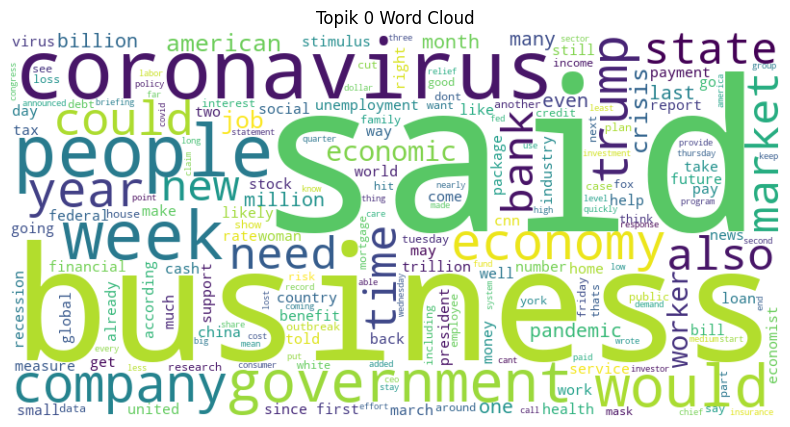


WordCloud Topik 1


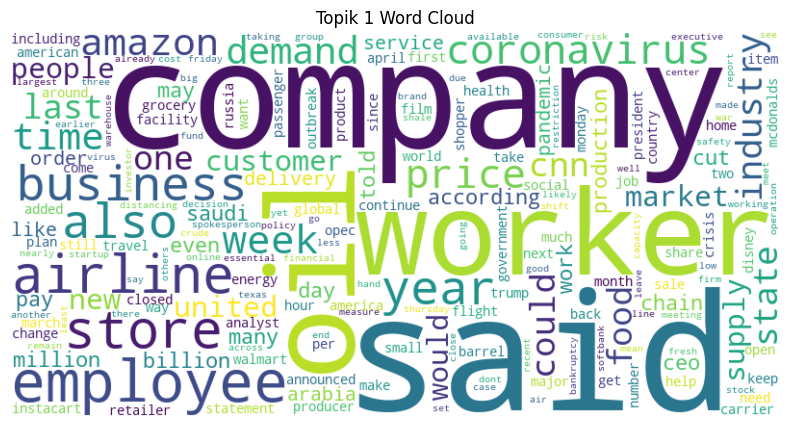


WordCloud Topik 2


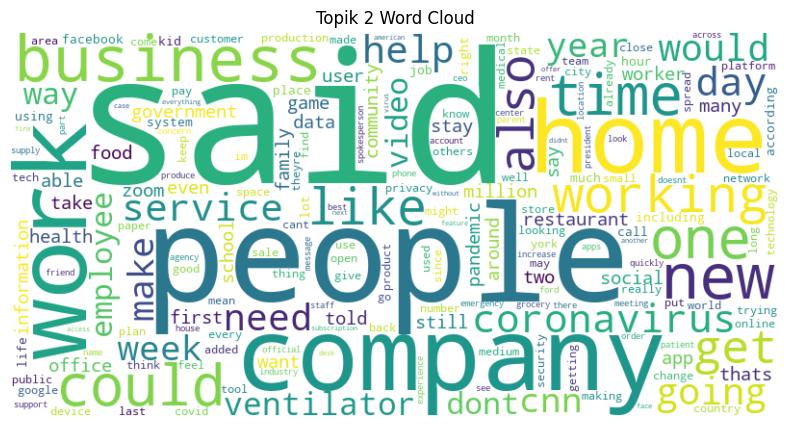

In [19]:
### WORDCLOUD PERTOPIK

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nWordCloud Topik {topic_idx}")
    word_freq = {feature_names[i]: topic[i] for i in range(len(feature_names))}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topik {topic_idx} Word Cloud")
    plt.show()

In [20]:
### Tabel Kata Dominan per Topik

top_words = 5
topics_data = []

for topic_idx, topic in enumerate(lda_model.components_):
    top_features_indices = topic.argsort()[:-top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_indices]
    top_weights = topic[top_features_indices]
    for word, weight in zip(top_features, top_weights):
        topics_data.append({'Topic': f'Topic_{topic_idx}', 'Word': word, 'Weight': weight})

topics_df = pd.DataFrame(topics_data)
print("Tabel Kata Dominan per Topik:")
display(topics_df)

Tabel Kata Dominan per Topik:


,Topic,Word,Weight
0,Topic_0,said,720.527219
1,Topic_0,business,363.429102
2,Topic_0,coronavirus,337.606552
3,Topic_0,people,307.359793
4,Topic_0,week,265.944538
5,Topic_1,said,581.139411
6,Topic_1,company,494.976963
7,Topic_1,oil,310.159916
8,Topic_1,worker,297.421164
9,Topic_1,employee,269.574900


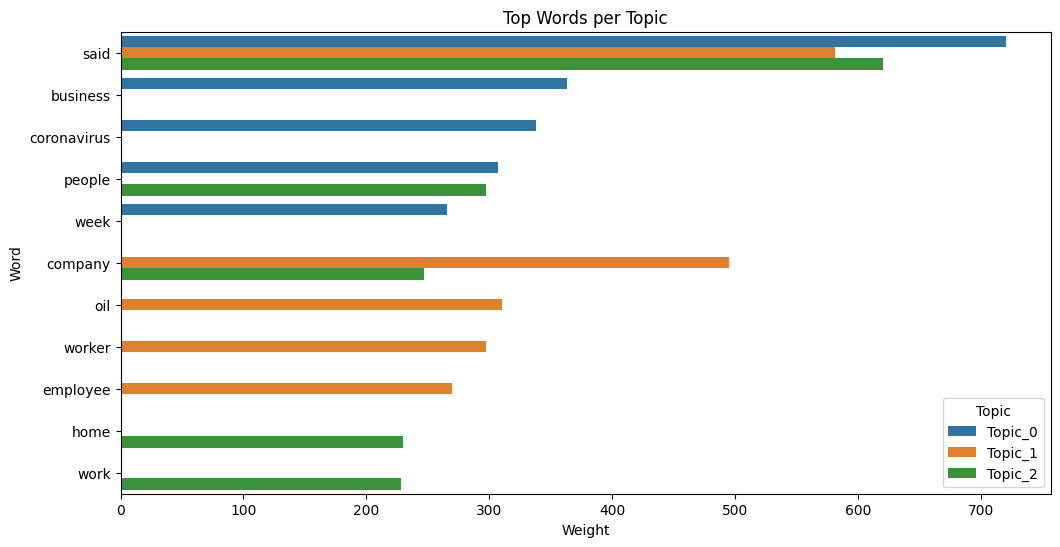

In [21]:
### Bar Chart Kata Dominan per Topik

plt.figure(figsize=(12,6))
sns.barplot(x='Weight', y='Word', hue='Topic', data=topics_df)
plt.title('Top Words per Topic')
plt.xlabel('Weight')
plt.ylabel('Word')
plt.legend(title='Topic')
plt.show()

In [51]:
### Distribusi Topik per Dokumen
doc_topic_df = pd.DataFrame(lda_model.transform(X_count), columns=[f'Topic_{i}' for i in range(n_topics)])
print("\nDistribusi Topik per Dokumen:")
display(doc_topic_df)


Distribusi Topik per Dokumen:


,Topic_0,Topic_1,Topic_2
0,0.000685,0.000652,0.998663
1,0.001058,0.997939,0.001003
2,0.997627,0.001216,0.001157
3,0.999060,0.000469,0.000471
4,0.870615,0.128817,0.000568
...,...,...,...
296,0.086837,0.277336,0.635827
297,0.001413,0.536475,0.462112
298,0.543495,0.000869,0.455636
299,0.001021,0.001041,0.997938


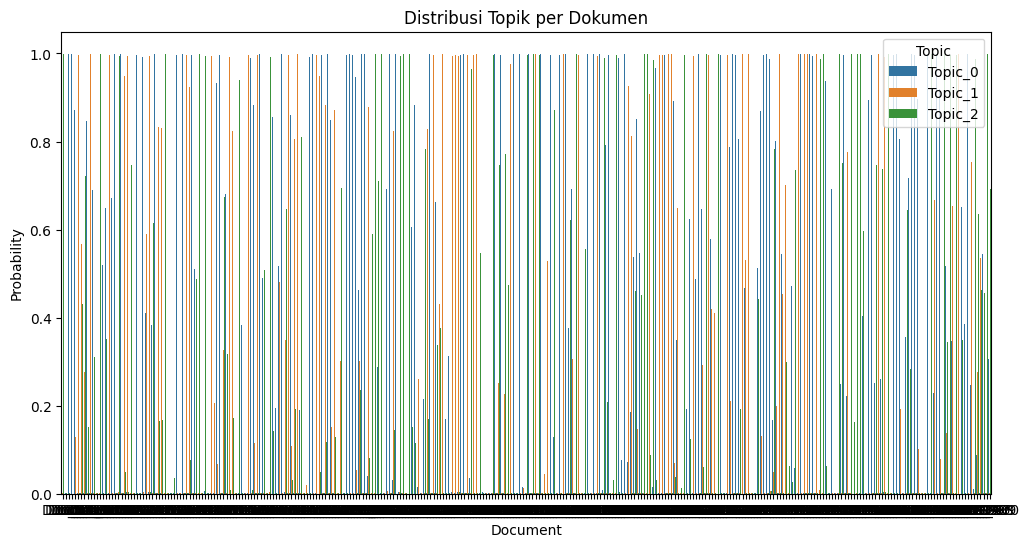

In [52]:
### Bar chart distribusi topik per dokumen
doc_topic_df['Document'] = [f'Doc_{i}' for i in range(len(doc_topic_df))]
doc_topic_melt = doc_topic_df.melt(id_vars='Document', var_name='Topic', value_name='Probability')

plt.figure(figsize=(12,6))
sns.barplot(x='Document', y='Probability', hue='Topic', data=doc_topic_melt)
plt.title('Distribusi Topik per Dokumen')
plt.ylabel('Probability')
plt.show()

C:\Users\Java Computer\AppData\Local\Temp\ipykernel_856\1501757298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


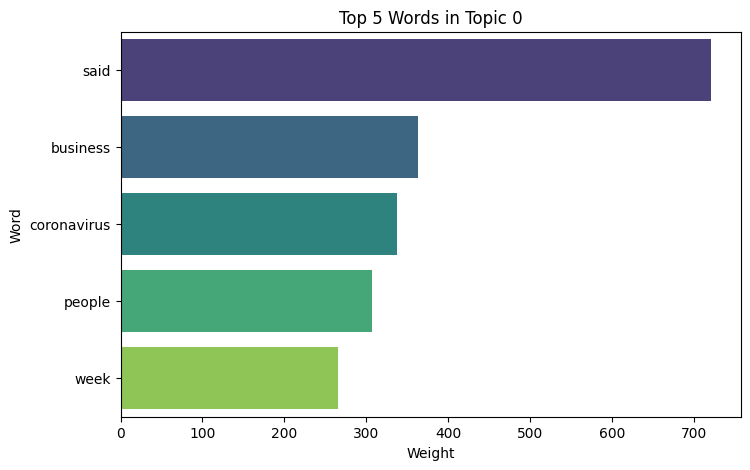

C:\Users\Java Computer\AppData\Local\Temp\ipykernel_856\1501757298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


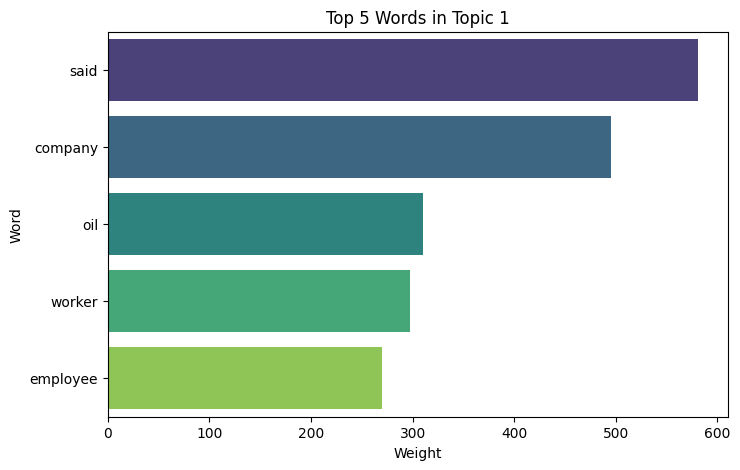

C:\Users\Java Computer\AppData\Local\Temp\ipykernel_856\1501757298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


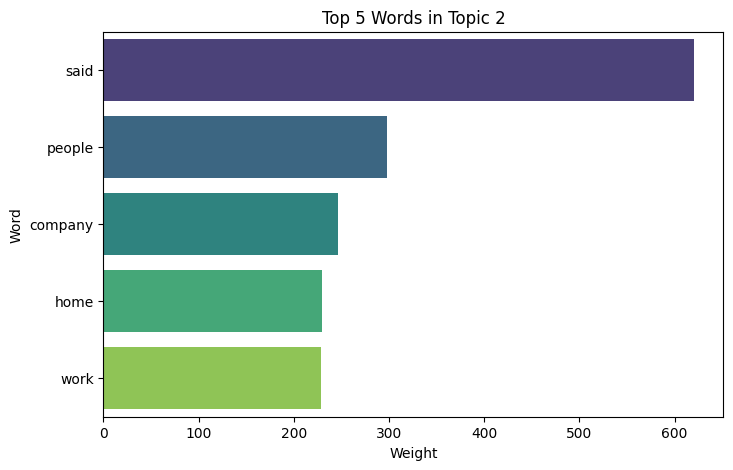

In [23]:
### Bar Chart per Topik
n_topics = lda_model.n_components
for t in range(n_topics):
    plt.figure(figsize=(8,5))
    df_plot = topics_df[topics_df['Topic'] == f'Topic_{t}']
    sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')
    plt.title(f'Top {top_words} Words in Topic {t}')
    plt.xlabel('Weight')
    plt.ylabel('Word')
    plt.show()

# Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

In [28]:
doc_topics = lda_model.transform(X_count)  
dominant_topic = np.argmax(doc_topics, axis=1)

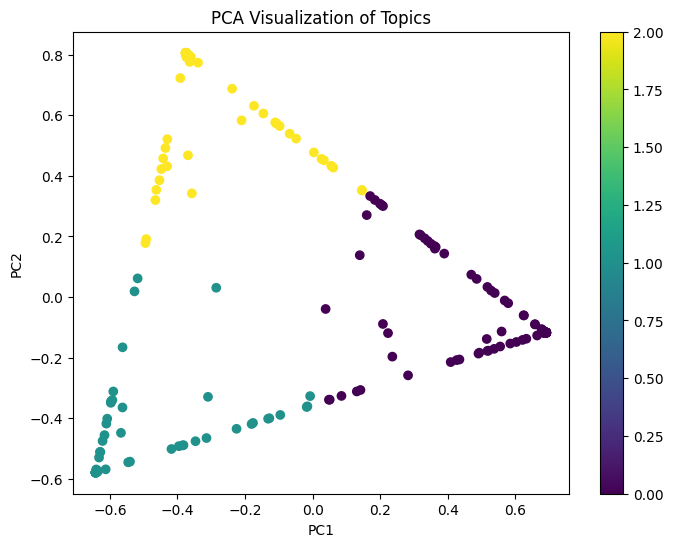

In [33]:
### PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(doc_topics)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=doc_topics.argmax(axis=1))
plt.colorbar()
plt.title("PCA Visualization of Topics")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

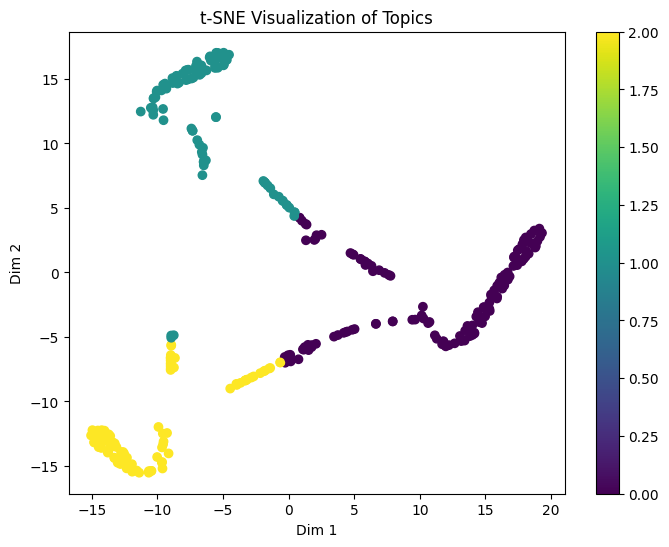

In [34]:
### T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(doc_topics)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=doc_topics.argmax(axis=1))
plt.colorbar()
plt.title("t-SNE Visualization of Topics")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()